## Write A Data Science Blog Post
##### by Markus Müller


Content:
1. Gather
2. Assess
3. Clean



Three Questions:
1. Availability and prive development
2. which neighborhoods are most expensive
3. Which amenities can be expected at a given price?
4. What feature predicts price 

Data: Boston Airbnb Open Data from <a href='https://www.kaggle.com/airbnb/boston'>Kaggle</a>

Structure:
- listings: full descriptions and average review score
- reviews: unique id for each reviewer and detailed comments
- calendar: listing id and the price and availability for that day

In [1]:
# imports
import datetime
import numpy as np
import pandas as pd
pd.set_option("max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os

import plotly.express as px
import plotly.io as pio # export plotly visualizations to HTML


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# set seaborn style to get uniform visualizations

#set base color
b_color = sns.color_palette()[0]
# set seaborn style for uniform 
sns.set_style('whitegrid')

### Gather

In [3]:
# create folder
folder_name = 'Data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
# load data into DataFrames
calendar = pd.read_csv('Data/calendar.csv')
listings = pd.read_csv('Data/listings.csv')
reviews = pd.read_csv('Data/reviews.csv')

### Assess

In [5]:
calendar

listing_id        date available price
0          12147973  2017-09-05         f   NaN
1          12147973  2017-09-04         f   NaN
2          12147973  2017-09-03         f   NaN
3          12147973  2017-09-02         f   NaN
4          12147973  2017-09-01         f   NaN
...             ...         ...       ...   ...
1308885    14504422  2016-09-10         f   NaN
1308886    14504422  2016-09-09         f   NaN
1308887    14504422  2016-09-08         f   NaN
1308888    14504422  2016-09-07         f   NaN
1308889    14504422  2016-09-06         f   NaN

[1308890 rows x 4 columns]

In [6]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [7]:
calendar.isnull().sum()

listing_id         0
date               0
available          0
price         665853
dtype: int64

In [8]:
calendar[calendar['price'].notna()]

listing_id        date available   price
365         3075044  2017-08-22         t  $65.00
366         3075044  2017-08-21         t  $65.00
367         3075044  2017-08-20         t  $65.00
368         3075044  2017-08-19         t  $75.00
369         3075044  2017-08-18         t  $75.00
...             ...         ...       ...     ...
1308875    14504422  2016-09-20         t  $62.00
1308876    14504422  2016-09-19         t  $62.00
1308877    14504422  2016-09-18         t  $62.00
1308878    14504422  2016-09-17         t  $62.00
1308879    14504422  2016-09-16         t  $62.00

[643037 rows x 4 columns]

In [9]:
# availabe (t = True / f = False)
calendar.query('available == "f"')

listing_id        date available price
0          12147973  2017-09-05         f   NaN
1          12147973  2017-09-04         f   NaN
2          12147973  2017-09-03         f   NaN
3          12147973  2017-09-02         f   NaN
4          12147973  2017-09-01         f   NaN
...             ...         ...       ...   ...
1308885    14504422  2016-09-10         f   NaN
1308886    14504422  2016-09-09         f   NaN
1308887    14504422  2016-09-08         f   NaN
1308888    14504422  2016-09-07         f   NaN
1308889    14504422  2016-09-06         f   NaN

[665853 rows x 4 columns]

In [10]:
listings

id                            listing_url       scrape_id  \
0     12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1      3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2         6976      https://www.airbnb.com/rooms/6976  20160906204935   
3      1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4      7651065   https://www.airbnb.com/rooms/7651065  20160906204935   
...        ...                                    ...             ...   
3580   8373729   https://www.airbnb.com/rooms/8373729  20160906204935   
3581  14844274  https://www.airbnb.com/rooms/14844274  20160906204935   
3582  14585486  https://www.airbnb.com/rooms/14585486  20160906204935   
3583  14603878  https://www.airbnb.com/rooms/14603878  20160906204935   
3584  14504422  https://www.airbnb.com/rooms/14504422  20160906204935   

     last_scraped                                           name  \
0      2016-09-07                     Sunny Bungalow in the City   
1      2016-09-07              Charming room in pet friendly apt   
2      2016-09-07               Mexican Folk Art Haven in Boston   
3      2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4      2016-09-07                            Come Home to Boston   
...           ...                                            ...   
3580   2016-09-07                           Big cozy room near T   
3581   2016-09-07            BU Apartment DexterPark Bright room   
3582   2016-09-07                       Gorgeous funky apartment   
3583   2016-09-07          Great Location; Train and Restaurants   
3584   2016-09-07             (K1) Private Room near Harvard/MIT   

                                                summary  \
0     Cozy, sunny, family home.  Master bedroom high...   
1     Charming and quiet room in a second floor 1910...   
2     Come stay with a friendly, middle-aged guy in ...   
3     Come experience the comforts of home away from...   
4     My comfy, clean and relaxing home is one block...   
...                                                 ...   
3580  5 min walking to Orange Line subway with 2 sto...   
3581  Most popular apartment in BU, best located in ...   
3582  Funky little apartment close to public transpo...   
3583  My place is close to Taco Loco Mexican Grill, ...   
3584  My place is close to My home is a warm and fri...   

                                                  space  \
0     The house has an open and cozy feel at the sam...   
1     Small but cozy and quite room with a full size...   
2     Come stay with a friendly, middle-aged guy in ...   
3     Most places you find in Boston are small howev...   
4     Clean, attractive, private room, one block fro...   
...                                                 ...   
3580                                                NaN   
3581                                Best location in BU   
3582  Modern and relaxed space with many facilities ...   
3583                                                NaN   
3584  To ensure a smooth check in: 1. You MUST have ...   

                                            description experiences_offered  \
0     Cozy, sunny, family home.  Master bedroom high...                none   
1     Charming and quiet room in a second floor 1910...                none   
2     Come stay with a friendly, middle-aged guy in ...                none   
3     Come experience the comforts of home away from...                none   
4     My comfy, clean and relaxing home is one block...                none   
...                                                 ...                 ...   
3580  5 min walking to Orange Line subway with 2 sto...                none   
3581  Most popular apartment in BU, best located in ...                none   
3582  Funky little apartment close to public transpo...                none   
3583  My place is close to Taco Loco Mexican Grill, ...                none   
3584  My place is close to My h

In [11]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [12]:
# used this cell to visually assess different columns
listings[['id', 'price', 'weekly_price', 'monthly_price', 'cleaning_fee']]

id    price weekly_price monthly_price cleaning_fee
0     12147973  $250.00          NaN           NaN       $35.00
1      3075044   $65.00      $400.00           NaN       $10.00
2         6976   $65.00      $395.00     $1,350.00          NaN
3      1436513   $75.00          NaN           NaN       $50.00
4      7651065   $79.00          NaN           NaN       $15.00
...        ...      ...          ...           ...          ...
3580   8373729   $69.00          NaN           NaN          NaN
3581  14844274  $150.00          NaN           NaN       $15.00
3582  14585486  $198.00          NaN           NaN          NaN
3583  14603878   $65.00          NaN           NaN          NaN
3584  14504422   $65.00          NaN           NaN       $25.00

[3585 rows x 5 columns]

In [13]:
# used this cell to visually assess different columns
listings[['id', 'host_since', 'first_review', 'last_review', 'neighbourhood', 'neighbourhood_cleansed', 'property_type']]

id  host_since first_review last_review neighbourhood  \
0     12147973  2015-04-15          NaN         NaN    Roslindale   
1      3075044  2012-06-07   2014-06-01  2016-08-13    Roslindale   
2         6976  2009-05-11   2009-07-19  2016-08-05    Roslindale   
3      1436513  2013-04-21   2016-08-28  2016-08-28           NaN   
4      7651065  2014-05-11   2015-08-18  2016-09-01    Roslindale   
...        ...         ...          ...         ...           ...   
3580   8373729  2014-07-31   2015-09-18  2016-08-27    Somerville   
3581  14844274  2015-07-02          NaN         NaN           NaN   
3582  14585486  2014-01-14          NaN         NaN           NaN   
3583  14603878  2016-05-27   2016-08-27  2016-09-04    Somerville   
3584  14504422  2015-08-20          NaN         NaN    Somerville   

     neighbourhood_cleansed property_type  
0                Roslindale         House  
1                Roslindale     Apartment  
2                Roslindale     Apartment  
3                Roslindale         House  
4                Roslindale         House  
...                     ...           ...  
3580            Charlestown     Apartment  
3581                Allston     Apartment  
3582            Charlestown     Apartment  
3583            Charlestown     Apartment  
3584            Charlestown     Apartment  

[3585 rows x 7 columns]

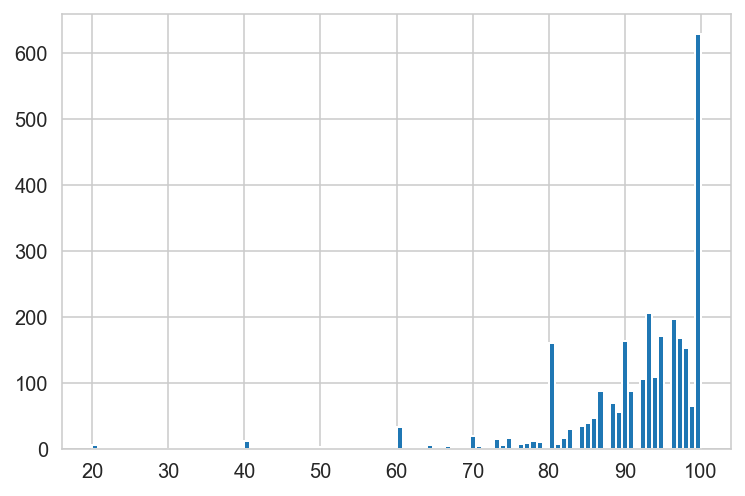

In [16]:
# check distribution of reviews
listings['review_scores_rating'].hist(bins=100);

In [18]:
listings.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   756
Length: 95, dtype: int64

In [19]:
reviews

listing_id        id        date  reviewer_id reviewer_name  \
0         1178162   4724140  2013-05-21      4298113       Olivier   
1         1178162   4869189  2013-05-29      6452964     Charlotte   
2         1178162   5003196  2013-06-06      6449554     Sebastian   
3         1178162   5150351  2013-06-15      2215611        Marine   
4         1178162   5171140  2013-06-16      6848427        Andrew   
...           ...       ...         ...          ...           ...   
68270     7462268  80537457  2016-06-18     22034145       Antonio   
68271     7462268  83640094  2016-07-03     40052513         Steve   
68272     7462268  85797088  2016-07-13     77129134          Nick   
68273     7462268  97264637  2016-08-26     15799803           Vid   
68274     7462268  98550693  2016-08-31     90128094       Arianna   

                                                comments  
0      My stay at islam's place was really cool! Good...  
1      Great location for both airport and city - gre...  
2      We really enjoyed our stay at Islams house. Fr...  
3      The room was nice and clean and so were the co...  
4      Great location. Just 5 mins walk from the Airp...  
...                                                  ...  
68270  Joe y su mujer son encantadores. La habitación...  
68271  Joe was on his way to Jamaica to be married! o...  
68272  The room was very clean as were the bathrooms ...  
68273  Staying in Lower Allston at Joe and Nancy's pl...  
68274  The room itself and the aprtment were very cle...  

[68275 rows x 6 columns]

In [20]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


#### Result Data Assessment

##### calendar
- `price` is an object 
- `date` should be a DateTimeObject

##### lisitings
- `price` in an object 
- `price` has outliers
- `host_since` should be a DateTimeObject

##### reviews
- `date` should be a DateTimeObject

### Data Cleaning

In [21]:
# copy DataFrames
calendar_clean = calendar.copy()
listings_clean = listings.copy()
reviews_clean = reviews.copy()

##### clean price coloumns

In [22]:
# function to clean and transform 
def clean_price(df, p_column):
    df['price_clean'] = df[p_column].str.replace('[$,]', '')
    df['price_clean'] = df['price_clean'].astype(float)
    df.drop(columns=p_column, inplace=True)

In [23]:
# apply function
clean_price(calendar_clean, 'price')
clean_price(listings_clean, 'price')

In [24]:
# check values
calendar_clean['price_clean'].value_counts()

150.0     20752
65.0      17518
75.0      16249
100.0     15499
200.0     14326
          ...  
2415.0        1
1148.0        1
1149.0        1
2046.0        1
1617.0        1
Name: price_clean, Length: 1246, dtype: int64

In [25]:
# check values
listings_clean['price_clean'].value_counts()

150.0    144
200.0    117
100.0    101
250.0     95
75.0      94
        ... 
241.0      1
211.0      1
132.0      1
599.0      1
999.0      1
Name: price_clean, Length: 324, dtype: int64

##### remove outliers in price columns

In [26]:
listings_clean = listings_clean.query('price_clean <= 1400.0')

In [27]:
#calendar_clean.query('price_clean >= 4000')['price_clean'].unique()

##### transforme date to DateTimeObject and extract day of week

In [28]:
calendar_clean['date'] = pd.to_datetime(calendar_clean['date'], format='%Y-%m-%d')
listings_clean['host_since'] = pd.to_datetime(listings_clean['host_since'], format='%Y-%m-%d')
reviews_clean['date'] = pd.to_datetime(reviews_clean['date'], format='%Y-%m-%d')

In [29]:
# get day of week from DateTimeObject
calendar_clean['day_of_week'] = calendar_clean['date'].dt.strftime('%a')

In [30]:
calendar_clean.head(5)

listing_id       date available  price_clean day_of_week
0    12147973 2017-09-05         f          NaN         Tue
1    12147973 2017-09-04         f          NaN         Mon
2    12147973 2017-09-03         f          NaN         Sun
3    12147973 2017-09-02         f          NaN         Sat
4    12147973 2017-09-01         f          NaN         Fri

### Question X: Availability

In [31]:
# create a DataFrame for each instance
available = calendar_clean.query('available == "t"')

In [32]:
available_price = calendar_clean.query('available =="t"').groupby('date')['price_clean'].mean()

In [33]:
# grouoby date to see the availability of each day
available_plot = available.groupby('date').count()

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



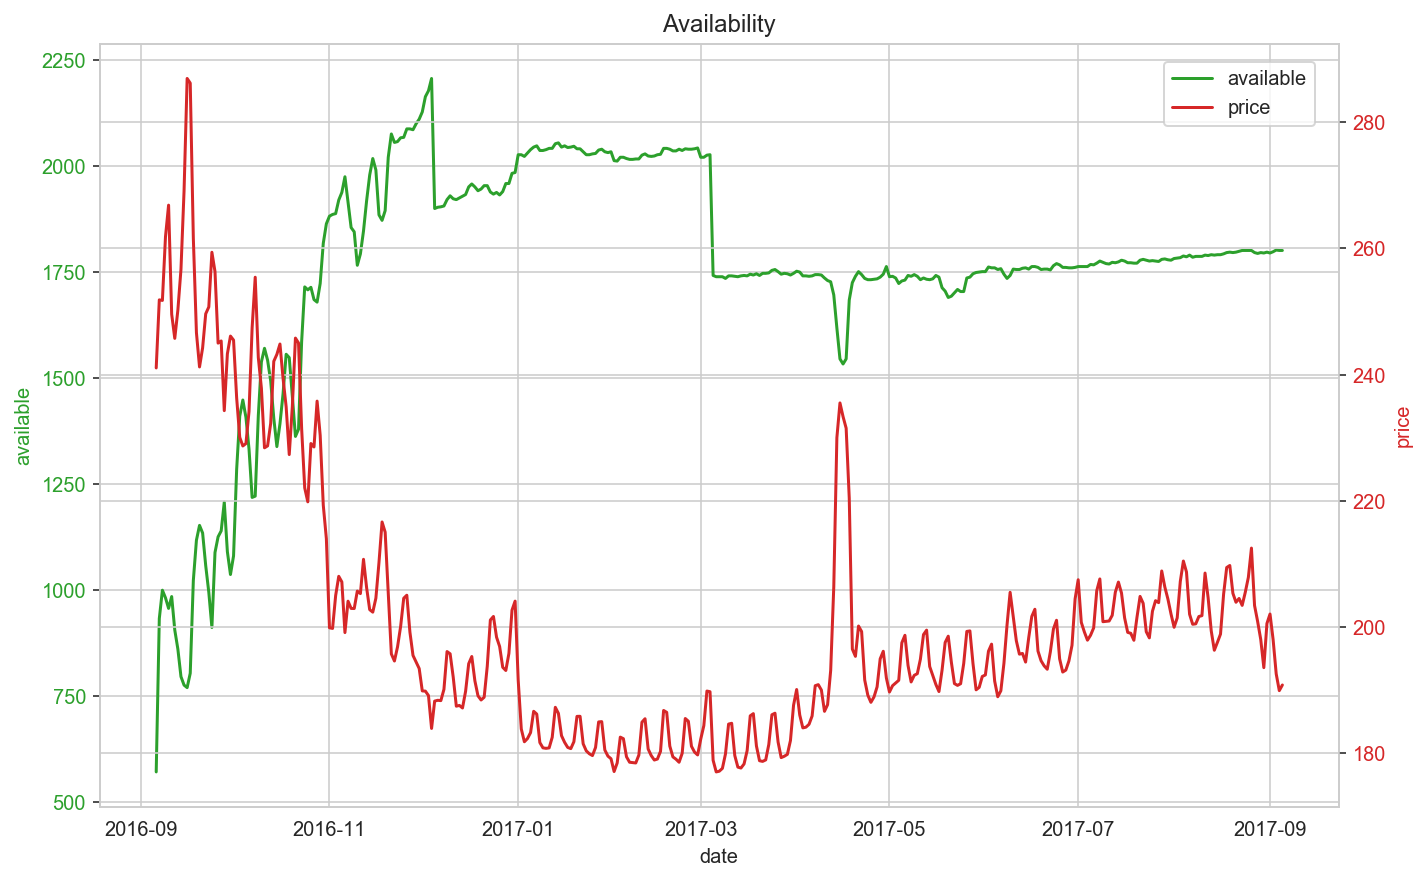

In [34]:
fig, ax1 = plt.subplots(figsize = (10,6))

color = 'tab:green'
ax1.set_xlabel('date')
ax1.set_ylabel('available', color=color)
ax1.plot(available_plot.index, available_plot['listing_id'], label = 'available', color = color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('price', color=color)  # we already handled the x-label with ax1
ax2.plot(available_price.index, available_price.values, label = 'price', color = color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Availability')
fig.legend(loc='upper right', bbox_to_anchor=(0.92, 0.96));
# https://matplotlib.org/gallery/api/two_scales.html

- there seems to be some seasonality in the price, because it has almost the same pattern 

In [35]:
# transform to cat to polt days of week in order
available['day_of_week'] = pd.Categorical(available['day_of_week'], 
                                          categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                          ordered=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



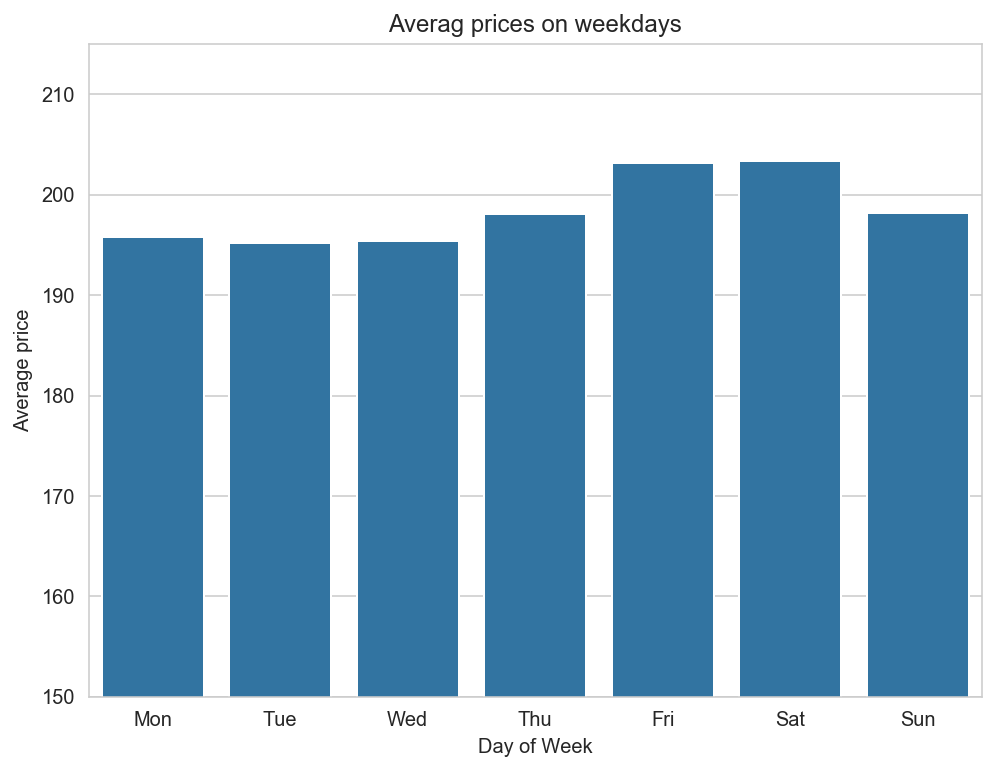

In [36]:
fig = plt.subplots(figsize=(8,6))
sns.barplot(x='day_of_week', y='price_clean', data=available, color=b_color, ci= None)
plt.title('Averag prices on weekdays')
plt.ylabel('Average price')
plt.xlabel('Day of Week')
plt.ylim(150,215);

there is a slightly higher price on Fridays and Saturdays

### Question X: Where to stay?

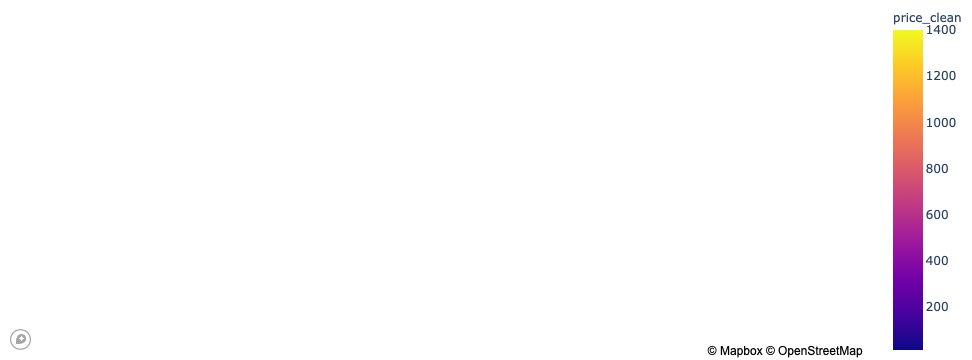

In [38]:
token = 'pk.eyJ1IjoibWFya2luZ2VyIiwiYSI6ImNrYXAzc2poOTBqc2gydXFudWdxeDAzb3kifQ._su7Ef8qqFBHuXa3tR1w9Q'
fig = px.scatter_mapbox(listings_clean, lat='latitude', lon="longitude", 
                        hover_data=['price_clean', 'neighbourhood_cleansed'],
                        color='price_clean', zoom=10, height=300,
                        #color_continuous_scale=px.colors.cyclical.IceFire)
                       )
fig.update_layout(mapbox_style='light', mapbox_accesstoken=token)
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()
# https://plotly.com/python/mapbox-layers/
# saves the output as HTML to use it in the Blog article
pio.write_html(fig, file='index.html', auto_open=True)
# https://towardsdatascience.com/how-to-create-a-plotly-visualization-and-embed-it-on-websites-517c1a78568b

### Question X: Neighberhoods

In [39]:
neighbourhoods = listings_clean[['id', 'neighbourhood', 'neighbourhood_cleansed', 'price_clean']]

In [40]:
neighbourhoods['neighbourhood_cleansed'].nunique()

25

In [41]:
neighbourhoods['neighbourhood_cleansed'].value_counts()

Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     289
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     82
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Bay Village                 24
Mattapan                    24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64

In [42]:
neighbourhoods.groupby('neighbourhood_cleansed')['price_clean'].mean().sort_values(ascending = False)

neighbourhood_cleansed
South Boston Waterfront    273.207317
Bay Village                266.833333
Leather District           253.600000
Back Bay                   240.950331
Downtown                   236.459302
Chinatown                  232.352113
Beacon Hill                224.443299
West End                   209.591837
Fenway                     207.314879
South End                  204.349693
Charlestown                198.045045
North End                  195.678322
South Boston               187.609195
Roxbury                    146.333333
Jamaica Plain              138.478134
Longwood Medical Area      138.444444
Mission Hill               121.967742
East Boston                119.153333
Brighton                   118.767568
Allston                    112.307692
West Roxbury               107.108696
Roslindale                  98.428571
Dorchester                  91.639405
Hyde Park                   86.548387
Mattapan                    75.125000
Name: price_clean, dtype: f

In [43]:
neighbourhoods.groupby('neighbourhood_cleansed')['price_clean'].max().sort_values(ascending = False).head(5)

neighbourhood_cleansed
Roxbury                    1400.0
Fenway                     1372.0
Beacon Hill                1345.0
South End                  1300.0
South Boston Waterfront    1250.0
Name: price_clean, dtype: float64

In [44]:
neighbourhoods['price_clean'].mean()

172.06921574099917

In [45]:
neighbourhoods['diff_to_mean'] = neighbourhoods['price_clean'] - neighbourhoods['price_clean'].mean()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
neighbourhoods

id neighbourhood neighbourhood_cleansed  price_clean  diff_to_mean
0     12147973    Roslindale             Roslindale        250.0     77.930784
1      3075044    Roslindale             Roslindale         65.0   -107.069216
2         6976    Roslindale             Roslindale         65.0   -107.069216
3      1436513           NaN             Roslindale         75.0    -97.069216
4      7651065    Roslindale             Roslindale         79.0    -93.069216
...        ...           ...                    ...          ...           ...
3580   8373729    Somerville            Charlestown         69.0   -103.069216
3581  14844274           NaN                Allston        150.0    -22.069216
3582  14585486           NaN            Charlestown        198.0     25.930784
3583  14603878    Somerville            Charlestown         65.0   -107.069216
3584  14504422    Somerville            Charlestown         65.0   -107.069216

[3583 rows x 5 columns]

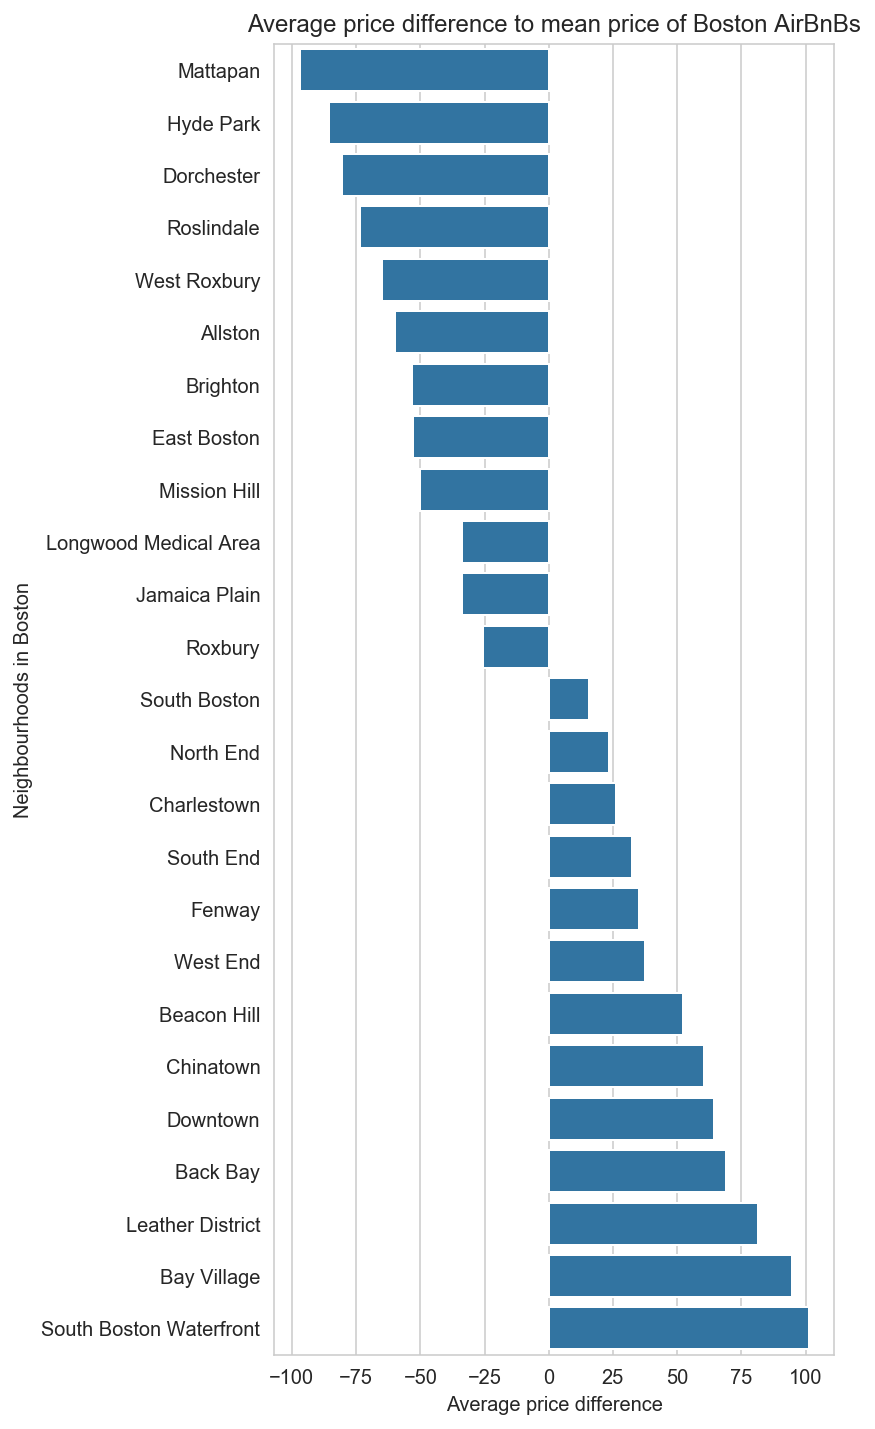

In [48]:
fig = plt.subplots(figsize=(6,10))
sns.barplot(y='neighbourhood_cleansed', x='diff_to_mean', data=neighbourhoods, 
            order=neighbourhoods.groupby('neighbourhood_cleansed')['diff_to_mean'].mean().sort_values().index,
            ci= None, color=b_color)
#plt.xticks(rotation=90)
plt.title('Average price difference to mean price of Boston AirBnBs')
plt.ylabel('Neighbourhoods in Boston')
plt.xlabel('Average price difference')
plt.tight_layout()

### Question X: Which amenities can be expected at a given price?

In [49]:
amenities = listings_clean[['id', 'price_clean', 'amenities']]

In [50]:
amenities['amenities'] = amenities['amenities'].str.replace("[{}]", "")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
amenity_dummy = amenities['amenities'].str.get_dummies(sep = ",")

In [52]:
amenity_dummy.drop(columns=['"translation missing: en.hosting_amenity_49"', '"translation missing: en.hosting_amenity_50"'], inplace=True)

In [53]:
amenity_dummy.columns = amenity_dummy.columns.str.replace('"','')

In [54]:
amenity_dummy.head(2)

24-Hour Check-in  Air Conditioning  Buzzer/Wireless Intercom  Cable TV  \
0                 0                 0                         0         0   
1                 0                 1                         0         0   

   Carbon Monoxide Detector  Elevator in Building  Family/Kid Friendly  \
0                         0                     0                    1   
1                         1                     0                    1   

   Fire Extinguisher  First Aid Kit  Free Parking on Premises  \
0                  1              0                         1   
1                  1              0                         0   

   Free Parking on Street  Hair Dryer  Hot Tub  Indoor Fireplace  \
0                       0           0        0                 0   
1                       0           1        0                 0   

   Laptop Friendly Workspace  Lock on Bedroom Door  Other pet(s)  \
0                          1                     0             0   
1                          0                     1             0   

   Paid Parking Off Premises  Pets Allowed  Pets live on this property  \
0                          0             0                           1   
1                          0             1                           1   

   Safety Card  Smoke Detector  Smoking Allowed  Suitable for Events  \
0            0               1                0                    0   
1            0               1                0                    0   

   Washer / Dryer  Wheelchair Accessible  Wireless Internet  Breakfast  \
0               0                      0                  1          0   
1               0                      0                  1          0   

   Cat(s)  Dog(s)  Doorman  Dryer  Essentials  Gym  Hangers  Heating  \
0       0       1        0      1           1    0        0        1   
1       0       1        0      1           1    0        1        1   

   Internet  Iron  Kitchen  Pool  Shampoo  TV  Washer  
0         0     0        1     0        1   1       1  
1         1     1        1     0        1   1       1

### Question X: What contributes to a high price

In [55]:
# prices higher than 600 will be romoved fot this question
listings_clean = listings_clean.query('price_clean <= 600')

In [56]:
#create a DataFrame which contains possible variables influencing price 
model = listings_clean[['id', 'bedrooms', 'beds', 'bed_type', 'room_type','bathrooms', 'property_type', 
                        'neighbourhood_cleansed', 'cancellation_policy', 'number_of_reviews',
                        'review_scores_rating', 'reviews_per_month', 'host_is_superhost', 'amenities',
                        'cancellation_policy', 'guests_included', 'square_feet', 'price_clean']]

In [57]:
model.isnull().sum()

id                           0
bedrooms                    10
beds                         9
bed_type                     0
room_type                    0
bathrooms                   14
property_type                3
neighbourhood_cleansed       0
cancellation_policy          0
number_of_reviews            0
review_scores_rating       798
reviews_per_month          742
host_is_superhost            0
amenities                    0
cancellation_policy          0
guests_included              0
square_feet               3492
price_clean                  0
dtype: int64

In [58]:
model['bedrooms'].value_counts()

1.0    2367
2.0     684
0.0     287
3.0     147
4.0      39
5.0      13
Name: bedrooms, dtype: int64

In [59]:
model['beds'].corr(model['bedrooms'])

0.6975409285801463

In [60]:
model['bathrooms'].mean()#.value_counts()

1.2135578828191338

In [61]:
model['property_type'].value_counts()

Apartment          2586
House               554
Condominium         228
Townhouse            53
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [62]:
model['review_scores_rating'].median()

94.0

In [63]:
model['reviews_per_month'].value_counts()

1.00    114
2.00     53
0.08     28
3.00     26
0.09     26
       ... 
6.96      1
5.83      1
6.13      1
4.95      1
4.89      1
Name: reviews_per_month, Length: 644, dtype: int64

How to handle missing values:
- `square_feet` gets droped, because it has to many missing values
- `bedrooms`: since the mean is 1.24 and mode is 1, all missing values will get filled with 1
- `beds`: gets droped -> correlates with bedrooms
- `bathrooms`: since the mean is 1.21 and the mode is 1, all missing values will get filled with 1
- `property_type`: the three missing ones will be added to other
- `review_scores_rating`: because there is no pattern behind the missing value I will use the random sample method
- `reviews_per_month`: random sample method

more methods: https://towardsdatascience.com/8-clutch-ways-to-impute-missing-data-690481c6cb2b

##### fill missing values

In [64]:
# drop square_feet and beds
model.drop(columns=['square_feet', 'beds'], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
# bedrooms and bathrooms fill missing values with 1
model['bedrooms'] = model['bedrooms'].fillna(value=1)
model['bathrooms'] = model['bathrooms'].fillna(value=1)

In [81]:
# change property_type 
model['property_type'] = model['property_type'].fillna(value='Other')

In [67]:
#  https://stackoverflow.com/questions/36413314/filling-missing-data-by-random-choosing-from-non-missing-values-in-pandas-datafr
def fill_with_random(df2, column):
    '''Fill `df2`'s column with name `column` with random data based on non-NaN data from `column`'''
    df = df2.copy()
    df[column] = df[column].apply(lambda x: np.random.choice(df[column].dropna().values) if np.isnan(x) else x)
    return df

In [68]:
model = fill_with_random(model, 'review_scores_rating')
model = fill_with_random(model, 'reviews_per_month')

In [83]:
# check for missing values
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3547 entries, 0 to 3584
Data columns (total 16 columns):
id                        3547 non-null int64
bedrooms                  3547 non-null float64
bed_type                  3547 non-null object
room_type                 3547 non-null object
bathrooms                 3547 non-null float64
property_type             3547 non-null object
neighbourhood_cleansed    3547 non-null object
cancellation_policy       3547 non-null object
number_of_reviews         3547 non-null int64
review_scores_rating      3547 non-null float64
reviews_per_month         3547 non-null float64
host_is_superhost         3547 non-null object
amenities                 3547 non-null object
cancellation_policy       3547 non-null object
guests_included           3547 non-null int64
price_clean               3547 non-null float64
dtypes: float64(5), int64(3), object(8)
memory usage: 471.1+ KB


##### identify relevant columns
- correlation matrix for numeric variables
- boxplots for categorical variables

In [85]:
#colums which could be ralated to the price 
price_corr = model[['price_clean', 'bathrooms', 'bedrooms', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month', 
                   'guests_included']]

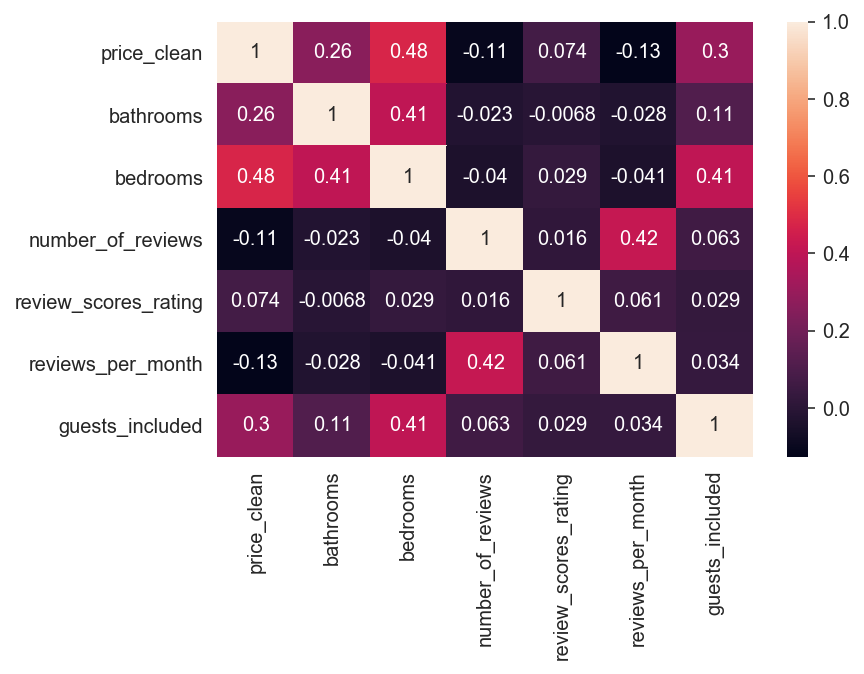

In [86]:
# create heatmap which shows the corrleation matrix
sns.heatmap(price_corr.corr(), annot=True);

There are some medium correlations for bathrooms, bedrooms and gusts_includes. There are also very small correlations for number of reviews and reviews per month. Intersting is that the review score isn't corrleated with price.

In [87]:
# lets check the mean price distribution for the reveiw scores
score = model.groupby('review_scores_rating')['price_clean'].mean().index
mean_price = model.groupby('review_scores_rating')['price_clean'].mean().values

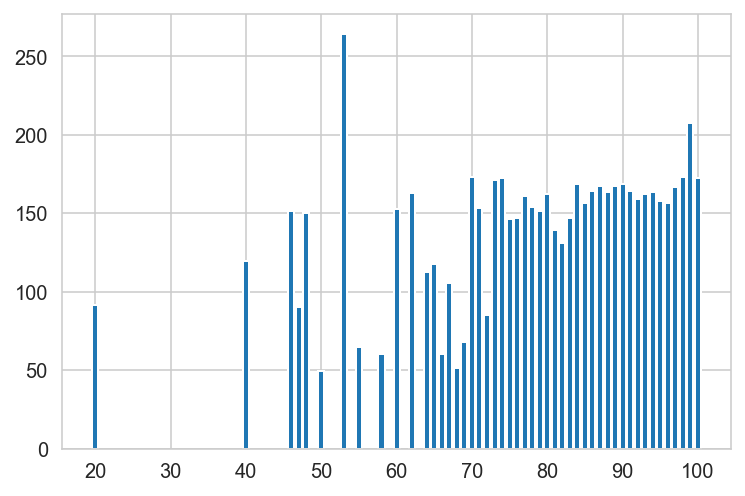

In [89]:
plt.bar(x=score, height=mean_price);

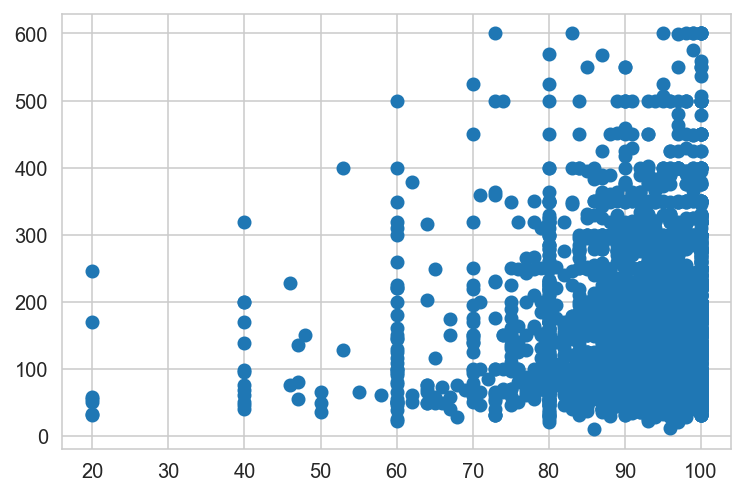

In [90]:
plt.scatter(x=model['review_scores_rating'], y=model['price_clean'])

There is no linearity between review score and price.

##### Let us now explore teh relationship between price and the categorical variables

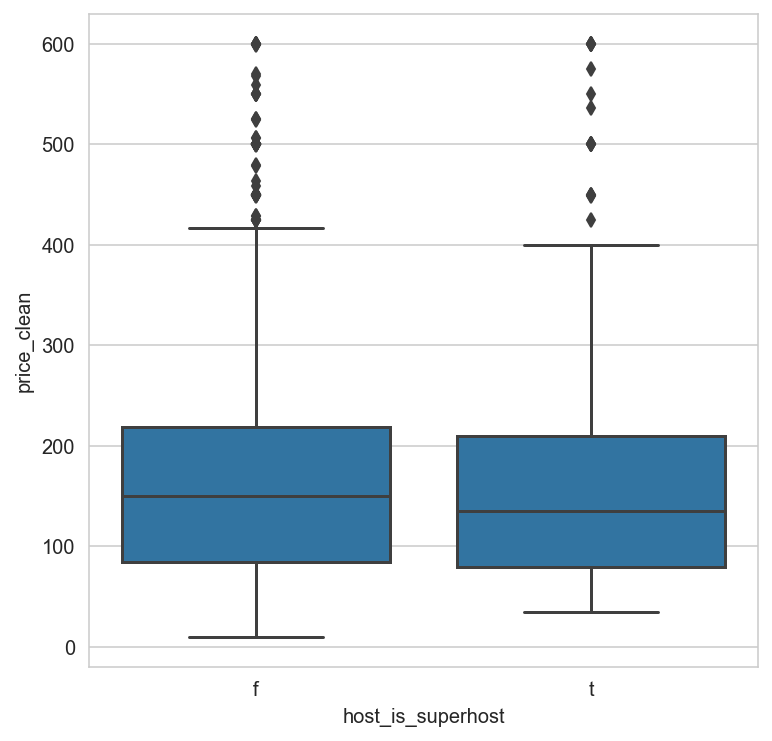

In [98]:
fig = plt.subplots(figsize=(6,6))
sns.boxplot(x='host_is_superhost', y='price_clean', data=listings_clean, color=b_color);

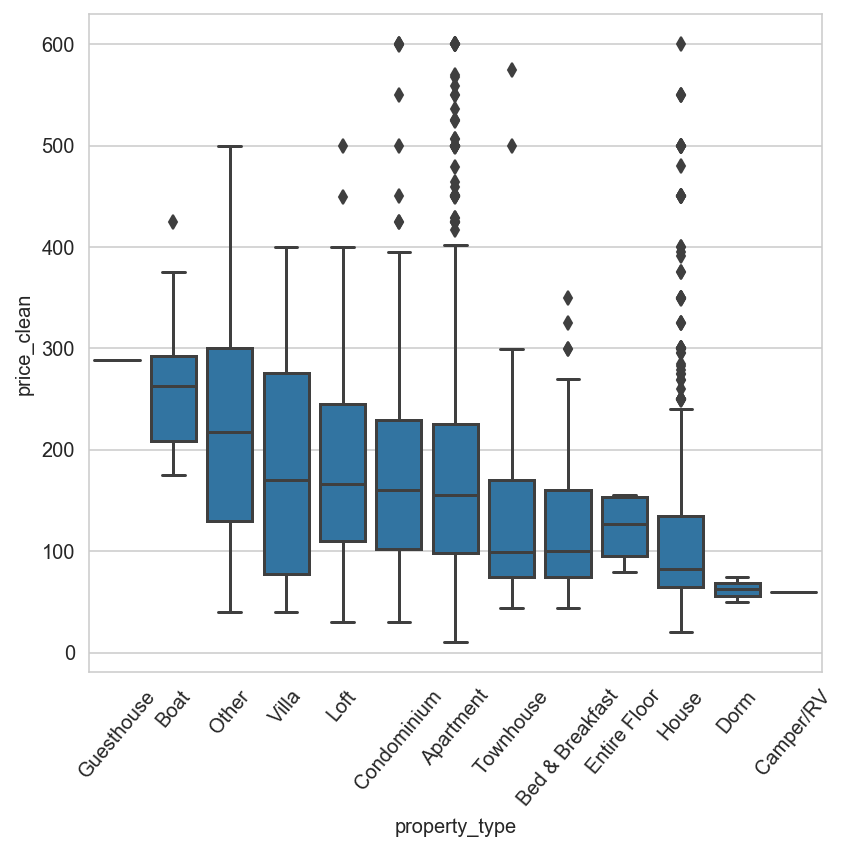

In [99]:
fig = plt.subplots(figsize=(6,6))
sns.boxplot(x='property_type', y='price_clean', data=listings_clean, 
            order=listings_clean.groupby('property_type')['price_clean'].mean().sort_values(ascending=False).index, 
            color=b_color)
plt.xticks(rotation=50)
plt.tight_layout();

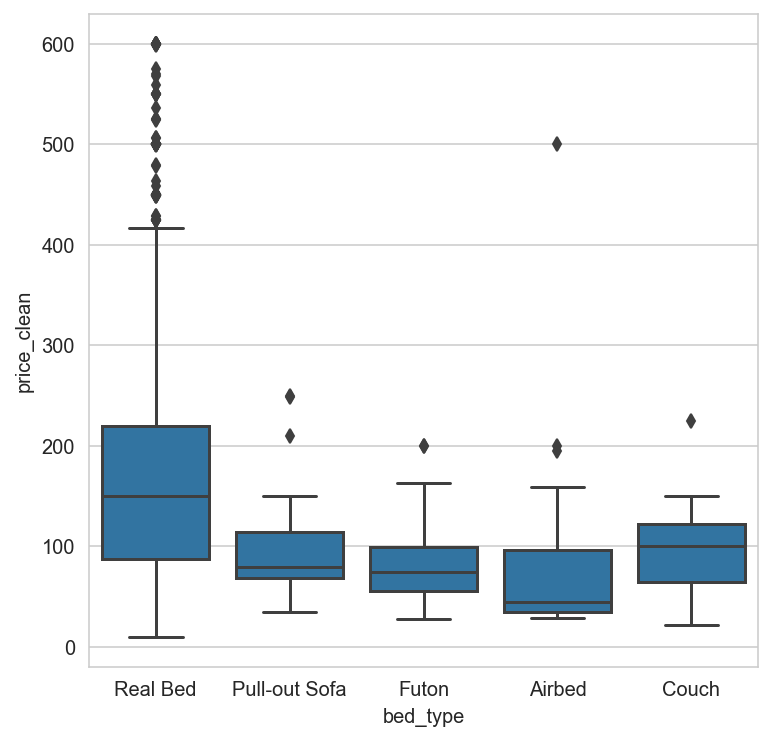

In [100]:
fig = plt.subplots(figsize=(6,6))
sns.boxplot(x='bed_type', y='price_clean', data=listings_clean, color=b_color);

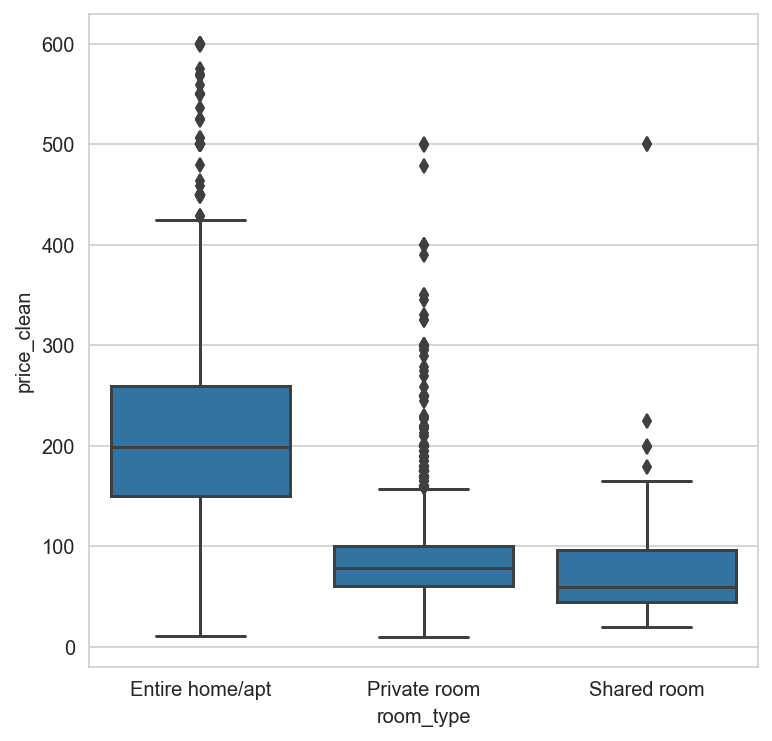

In [101]:
fig = plt.subplots(figsize=(6,6))
sns.boxplot(x='room_type', y='price_clean', data=listings_clean, color=b_color);

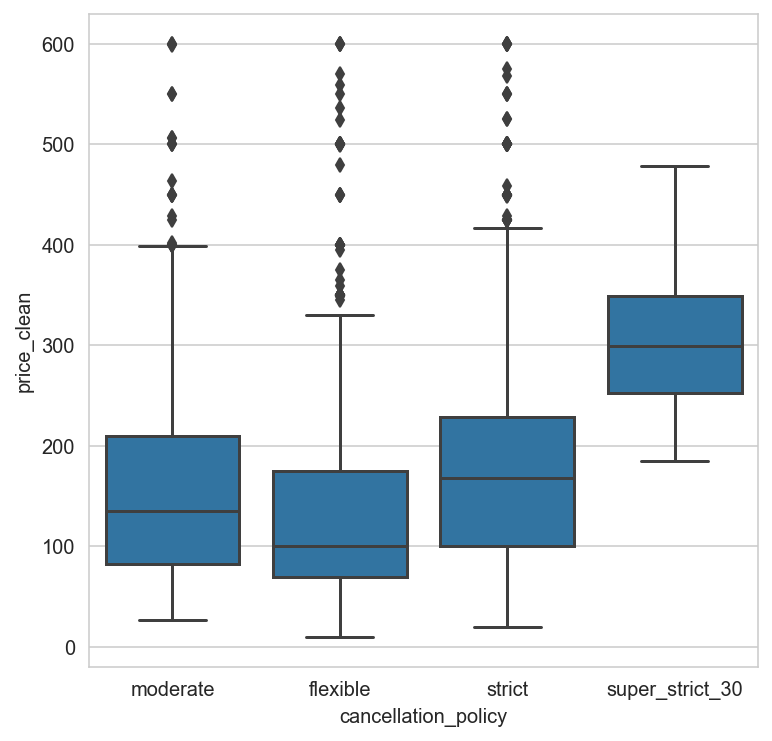

In [102]:
fig = plt.subplots(figsize=(6,6))
sns.boxplot(x='cancellation_policy', y='price_clean', data=listings_clean, color=b_color);

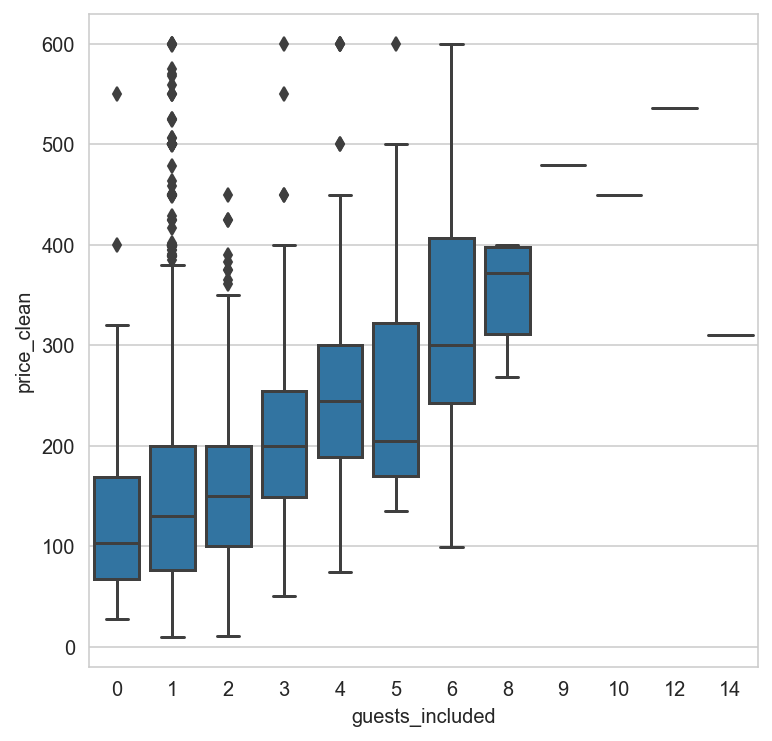

In [103]:
fig = plt.subplots(figsize=(6,6))
sns.boxplot(x='guests_included', y='price_clean', data=listings_clean, color=b_color);

#### Linear Regression to see what impacts price
What features should the model includ?
- `neighbourhood_cleansed` showed varianze between different neighbourhoods.
- `bathrooms` as well as `bedromms` had a medium correlation
- `review_scores_rating` hadn't a high correlation and the visual assesment didn't show an obvious pattern 
- `square_feet` would be interesting, but there are to many missing values
- `guests_included`

- property type

To do a linear regression we need to make some transformations:
- `price` is right skewed. To solve this we can transform the price, but then we will loose the interpretability so in this case price won't be transformed.
- `review_scores_rating` is left skewed, wo have to log the review score
- categorical columns like: `neighbourhood_cleansed`, `bathrooms`, `cancellation_policy`, `bedrooms`, `property_type` need to be transformed to dummy variables
- `property_type`: unpopular tyoes will be summarized as other
- the boxplots revealed more outliers in price so I will remove prices higher than $600
- `guests_included`: combine 7 and more into one category 

In [ ]:
listings_clean['price_clean'].hist(bins=100);

In [ ]:
listings_clean['review_scores_rating'].hist(bins=100);

In [ ]:
listings_clean['property_type'].value_counts()
# everything samller as Other will be included in Other

In [ ]:
types = ['Boat', 'Villa', 'Entire Floor', 'Dorm', 'Camper/RV', 'Guesthouse']
for ptype in types:
    listings_clean['property_type'] = np.where(listings_clean['property_type'] == ptype, 
                                               'Other', listings_clean['property_type'])

In [ ]:
listings_clean['property_type'].value_counts()

In [ ]:
values = [7, 8, 9, 10, 11, 12, 14]
for x in values:
    listings_clean['guests_included'] = np.where(listings_clean['guests_included'] == x, 
                                                 7, listings_clean['guests_included'])

In [ ]:
listings_clean['guests_included'].value_counts()

### Resources
- https://matplotlib.org/gallery/api/two_scales.html
- https://plotly.com/python/mapbox-layers/
- https://medium.com/analytics-vidhya/plotly-for-geomaps-bb75d1de189f
- https://towardsdatascience.com/how-to-create-a-plotly-visualization-and-embed-it-on-websites-517c1a78568b
- https://towardsdatascience.com/8-clutch-ways-to-impute-missing-data-690481c6cb2b
- https://stackoverflow.com/questions/36413314/filling-missing-data-by-random-choosing-from-non-missing-values-in-pandas-datafr